In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

## 1. Grouping movies.
In the **`movies`** database; the **`GROUP BY`** helps:

$\qquad \diamond$ Preferencing the `customers` by `country` or `gender`

$\qquad \diamond$ Searching the popularity of `movies` by `genre` or `release_year`

$\qquad \diamond$ Searching the `average_budget` of `movies` by `genre`

For example, look at the table **`movies_selected`** below,

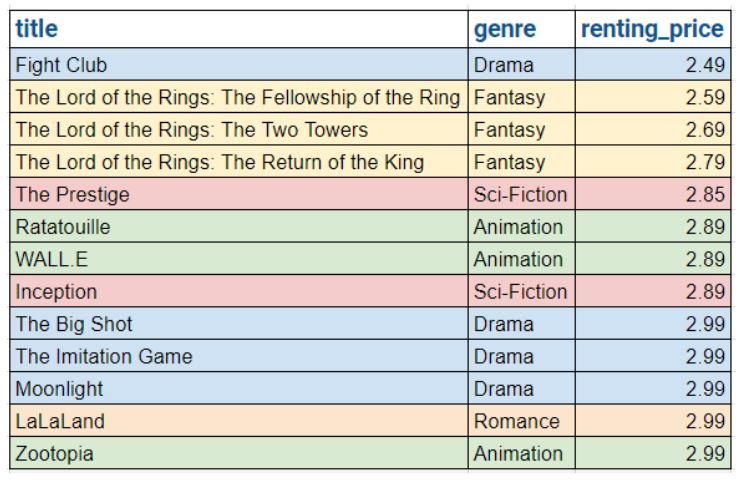

In [2]:
### 

$\qquad \diamond$ Searching the `movie_categories` from `movies_selected` by using `GROUP BY genre`

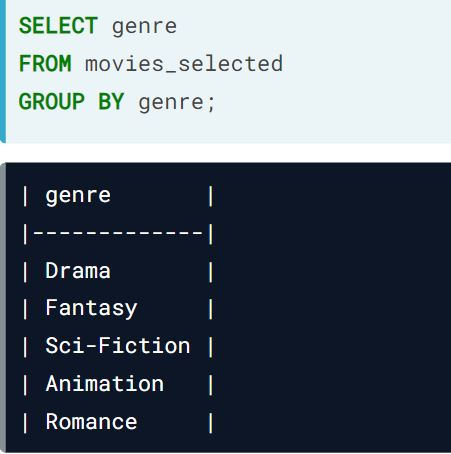

In [3]:
### 

$\qquad \diamond$ Searching the `average_renting_price` w.r.t the `movies_categories`

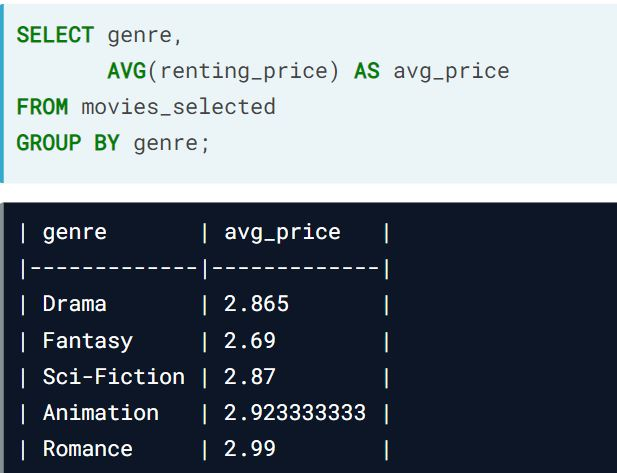

In [4]:
### 

$\qquad \diamond$ Spliting the `movies_selected` tables into each `movie_categories (genre)`

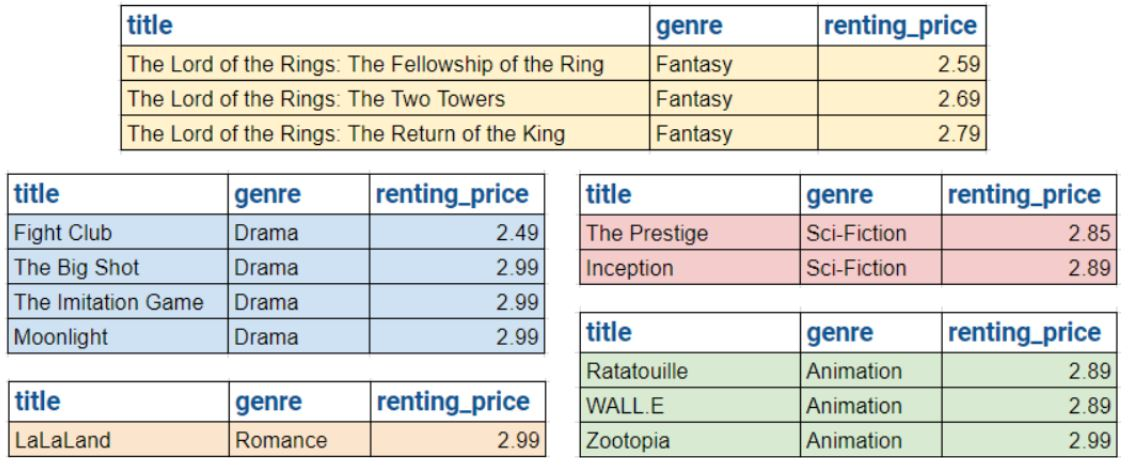

In [5]:
### 

$\qquad \diamond$ Searching the `average_renting_prices` and `number_of_films` w.r.t. `genre`

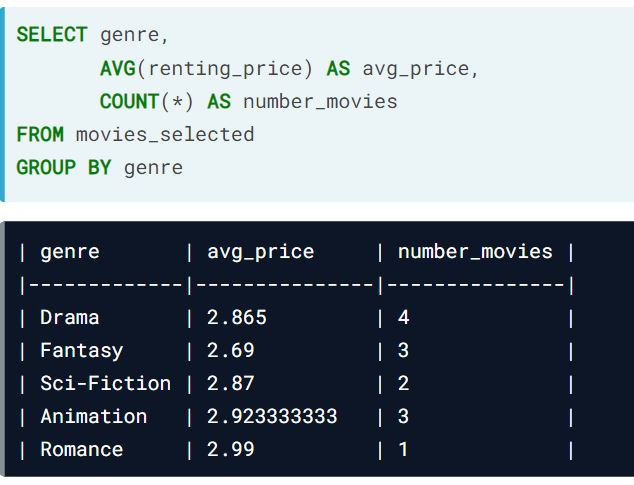

In [6]:
### 

$\qquad \diamond$ `Searching_group` **conditional on** the `aggregation function (COUNT, SUM, AVG, ...)` with **`HAVING`**

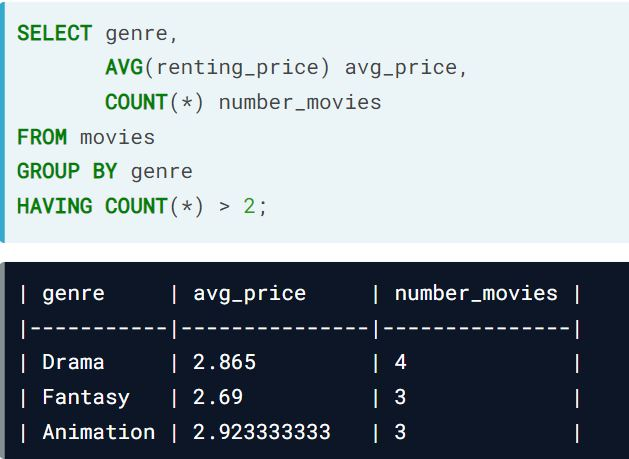

In [7]:
### 

### EXERCISEs.
#### Exercise 1.1. First account for each country.
$\qquad$ Conduct an analysis to see when the first customer accounts were created for each country.

**`customers` (table)**

customer_id|name|country|gender|date_of_birth|date_account_start
:-|:-|:-|:-|:-|:-
2|Wolfgang Ackermann|Austria|male|1971-11-17|2018-10-15
3|Daniela Herzog|Austria|female|1974-08-07|2019-02-14
4|Julia Jung|Austria|female|1991-01-04|2017-11-22
5|Juliane Kirsch|Austria|female|1977-03-01|2018-12-16
6|Rowanne Couperus|Belgium|female|1994-04-05|2018-08-26
...|...|...|...|...|...

`(122 rows)`

#### Instructions
- Create a table `with` a row for each country and columns for the country name and the date when the `first customer` account was created.
- Use the alias `first_account` for the column with the `dates`.
- Order by `date` in `ascending order`.

**SOLUTION.**

                        SELECT country,
                               MIN(date_account_start) AS first_account
                        FROM customers
                        GROUP BY country
                        ORDER BY first_account;
- **`query result`.**

country|first_account
:-|:-
France|2017-01-13
Hungary|2017-01-18
Belgium|2017-01-28
Slovenia|2017-01-31
Spain|2017-02-14
Italy|2017-02-28
Poland|2017-03-03
Great Britan|2017-03-31
Denmark|2017-04-30
USA|2017-09-13
Austria|2017-11-22

`(11 rows)`

- **Comments.** So the `first customer account` was created in `France` in `Jan 13, 2017`.

#### Exercise 1.2. Average movie ratings
$\qquad$ For each `movie` the `average rating`, the number of ratings and the number of `views` has to be reported. Generate a table with meaningful column names.

#### Instruction
**Step 1.** Group the data in the table `renting` by `movie_id` and report the `ID` and the `average rating`.
**SOLUTION.**

                        SELECT movie_id, AVG(rating)
                        FROM renting
                        GROUP BY movie_id
- **`query result`.**

movie_id|avg
:-|:-
54|8.1666666666666667
29|8.0000000000000000
71|8.0000000000000000
68|6.3333333333333333
4|7.8888888888888889
34|8.0000000000000000
...|...
27|8.2857142857142857
23|8.0000000000000000
56|5.6666666666666667
58|8.3333333333333333
8|8.0000000000000000

(`71 rows`)


**Step 2.**
- Add two columns for the number of `ratings` and the `number of movie rentals` to the results table.
- Use alias names `avg_rating`, `number_rating` and `number_renting` for the corresponding columns.

**SOLUTION.**

        SELECT movie_id, 
               AVG(rating) AS avg_rating,           -- Use as alias avg_rating
               COUNT(rating) AS number_rating,      -- Add column for number of ratings with alias...
               COUNT(renting_id) AS number_renting  -- Add column for number of movie rentals with alias...
        FROM renting
        GROUP BY movie_id;
- **`query result`.**

movie_id|avg_rating|number_rating|number_renting
:-:|-:|:-:|:-
54|8.1666666666666667|6|9
29|8.0000000000000000|7|11
71|8.0000000000000000|4|6
68|6.3333333333333333|3|7
4|7.8888888888888889|9|14
34|8.0000000000000000|6|8
...|...|...|...
27|8.2857142857142857|7|13
23|8.0000000000000000|7|11
56|5.6666666666666667|3|4
58|8.3333333333333333|3|10
8|8.0000000000000000|1|5

`(71 rows)`

**Step 3.**
- Order the rows of the table by the `average rating` such that it is in `decreasing order`.
- Observe what happens to `NULL` values

**SOLUTION.**

                SELECT movie_id, 
                       AVG(rating) AS avg_rating,
                       COUNT(rating) AS number_ratings,
                       COUNT(*) AS number_renting       -- The same with COUNT(renting_id) since it is necessary unique.
                FROM renting
                GROUP BY movie_id
                ORDER BY avg_rating DESC; -- Order by average rating in decreasing order
- **`query result`.**

movie_id|avg_rating|number_ratings|number_renting
:-:|-:|:-:|:-
11|null|0|6
48|10.0000000000000000|2|5
5|9.7500000000000000|4|8
42|9.6000000000000000|5|10
63|9.3333333333333333|6|11
65|9.0000000000000000|5|5
...|...|...|...
14|6.5000000000000000|6|11
68|6.3333333333333333|3|7
59|6.0000000000000000|2|5
43|6.0000000000000000|1|4
56|5.6666666666666667|3|4

`(71 rows)`


**Step 4. Answer this question** Which statement is **true** for the movie with `average rating` `null`?

- `A`. The `number of ratings` is 6.
- `B`. The `number of movie rentals` is zero.
- `C`. The `average` is `null` because `one of` the `ratings` of the movie is `null`.
- `D`. The `average` is `null` because `all of` the `ratings` of the movie are `null`.

**Answers & comments.**
- *A. Wrong!!* The number that **`no-rating`** is 6; **not the number of `ratings`**
- *B. Incorrect!!* If the number of movie rentals was zero, then the `movie` would not be in the list.
- *C. Wrong!!* Noting that the `average` is **not `null`** if **one of the values are `null`**.
- **D. Correct!!!** The `average value` is `null` **only if** `all values are null`.

#### Exercise 1.3. Average rating per customer
$\qquad$ Similar to what you just did, you will now look at the `average movie ratings`, this time for customers. So you will obtain a table with the average rating given by `each customer`. 

$\qquad$ Further, you will include the `number of ratings` and the `number of movie rentals` `per customer`. 

$\qquad$ You will report these `summary statistics` only for customers with `more than 7 movie rentals` and `order` them in `ascending` order by the `average rating`.

#### Instructions
- `Group` the data in the table `renting` by `customer_id` and report the `customer_id`, the `average rating`, the `number of ratings` and the `number of movie rentals`.
- Select only `customers` with `more than 7 movie rentals`.
- Order the resulting table by the `average rating` in `ascending` order.

**SOLUTION.**

- **`query result`.**

customer_id|avg|number_rating|number_renting
:-|:-:|:-:|-:
104|6.2500000000000000|4|8
28|6.7142857142857143|7|11
111|7.0000000000000000|3|10
113|7.0000000000000000|7|15
25|7.2000000000000000|5|10
21|7.3333333333333333|6|14
92|7.5714285714285714|7|11
49|7.6250000000000000|8|13
35|7.6666666666666667|6|9
52|7.8750000000000000|8|9
108|8.0000000000000000|6|10
114|8.0000000000000000|6|11
66|8.0000000000000000|7|10
93|8.4000000000000000|5|8
26|8.4000000000000000|5|10
94|8.7142857142857143|7|10
121|8.7500000000000000|4|9
7|9.0000000000000000|4|9
61|9.2000000000000000|5|8
8|9.2500000000000000|4|8
99|9.2500000000000000|4|8
65|9.3333333333333333|3|9

`(22 rows)`

- **Comments** You found out that `customer number 104` gave the `lowest average` `ratings` for `4 movies`.

## 2. Joining movie ratings with customer data
We first time introduce the concept **`JOIN`** in the course [Joinning data](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/tree/master/SQL%20practices/Joining%20data%20in%20SQL)
#### LEFT JOIN

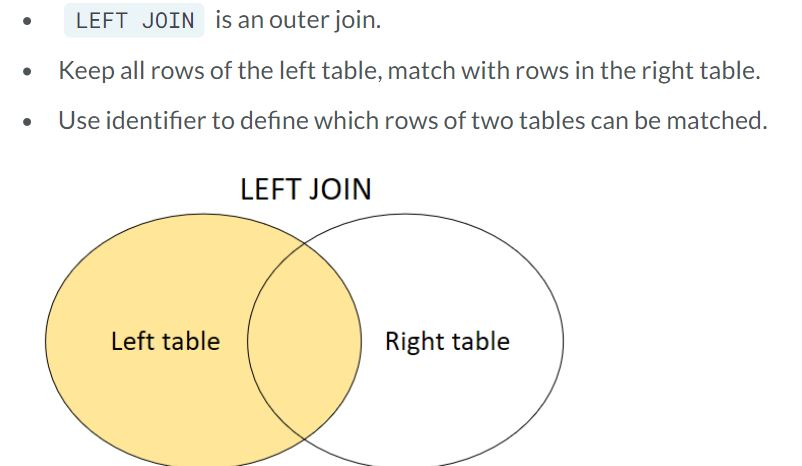

In [8]:
### 

$\qquad \diamond$ **`Syntax`.**

                            SELECT column_names
                            FROM Left_table
                            LEFT JOIN Right_table
                                ON Left_table.common_Left_column = Right_table.common_Right_column
$\quad \bullet$ For example, we have

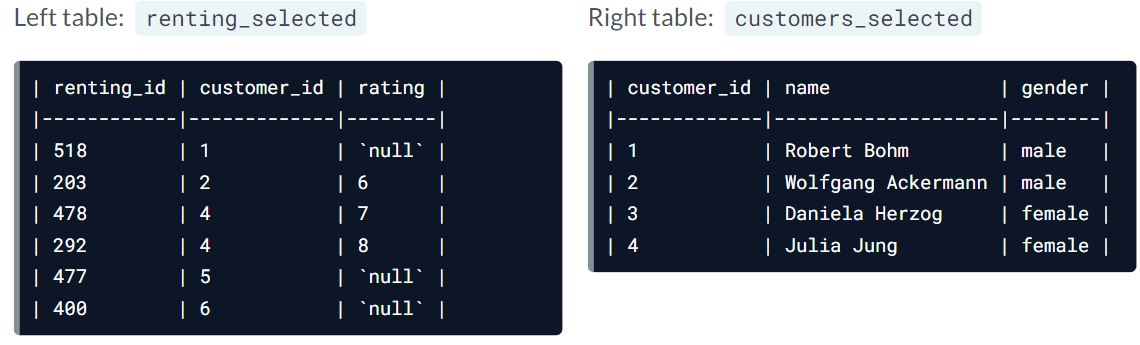

In [9]:
### 

$\quad \bullet$ Now, apply the `LEFT JOIN` and we obtain

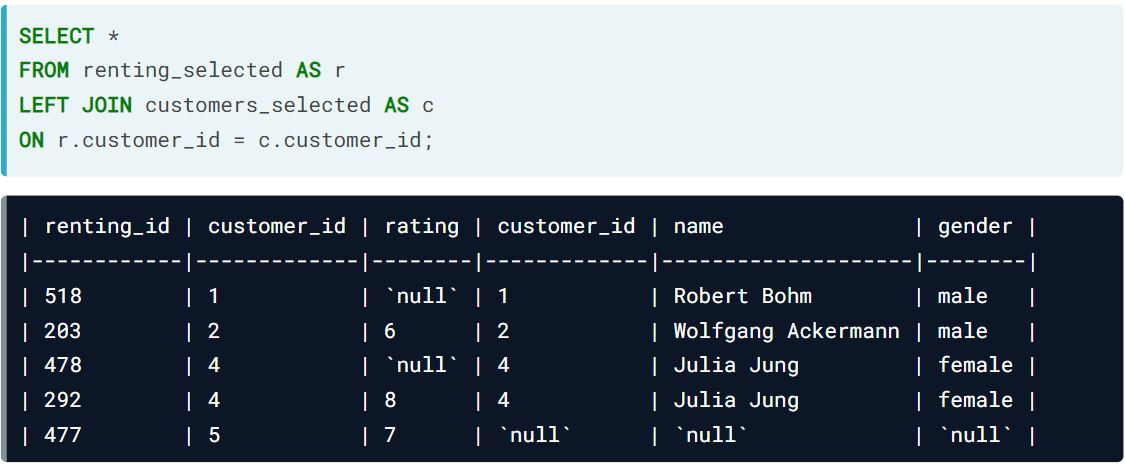

In [10]:
### Noting that, in the LEFT JOIN, then the missing values may be appear if it didnt exist from the right table

#### MORE THAN ONE JOIN with `LEFT JOIN (more than 2 times)`

$\quad \bullet$ For instance, assume that we have 3 tables `customers, movies, renting`, and we want :

$\qquad \diamond$ The `common column` in the `first joining` is the `movie_id`; contained in `movies` and `renting` tables

$\qquad \diamond$ The `common column` in the `second joining` is the `customer_id`; contained in `customers` and `renting` tables

$\qquad \diamond$ The `output` table must contain all the columns from `renting` and only `title` from `movie`, only `name` from `customers`

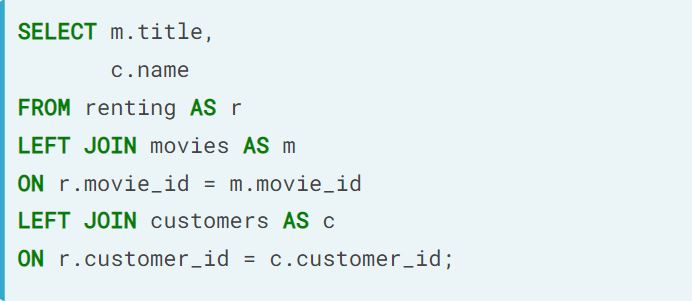

In [11]:
### 

### EXERCISEs.
#### Exercise 2.1. Join renting and customers
$\qquad$ For many analyses it is necessary to add `customer` information to the data in the table `renting`.

#### Instructions.
**Step 1.**
- Augment the table `renting (578 rows)` with all columns from the table `customers (122 rows)` with a `LEFT JOIN`.
- Use as alias' for the tables `r` and `c` respectively.

**SOLUTION.**

                    SELECT * FROM renting AS r
                    LEFT JOIN customers AS c
                        ON r.customer_id = c.customer_id

- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting|customer_id|name|country|gender|date_of_birth|date_account_start
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
1|41|8|null|2018-10-09|41|Zara Mitchell|Great Britan|female|1994-07-08|2017-06-12
2|10|29|10|2017-03-01|10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28
3|108|45|4|2018-06-08|108|Saúl Tafoya Meraz|Spain|male|1992-05-15|2017-03-13
4|39|66|8|2018-10-22|39|Amy Haynes|Great Britan|female|1975-07-28|2018-01-19
5|104|15|7|2019-03-18|104|Dimitri Zambrano Morales|Spain|male|1992-06-21|2017-04-1
...|...|...|...|...|...|...|...|...|...
574|7|14|null|2019-02-08|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12
575|45|31|10|2018-06-09|45|Vargha Ivett|Hungary|female|1998-11-27|2017-08-09
576|38|25|null|2018-09-02|38|Millie Marsden|Great Britan|female|1974-07-02|2017-11-06
577|35|65|9|2017-07-03|35|Harvey Jarvis|Great Britan|male|1990-01-16|2017-05-22
578|35|16|null|2017-06-20|35|Harvey Jarvis|Great Britan|male|1990-01-16|2017-05-22

- **Code explanation.**

`/-------------------` `renting` `--------------------\` `/------------------------` `customers` `----------------------------\`

`from renting_id to date_renting column`$\qquad\qquad\quad\quad$`from customer_id to date_account_start column`

`(578 rows, 5 columns)` $\qquad\qquad\qquad\qquad\qquad\qquad\quad$ `(122 rows, 6 columns)`

**Step 2.** Select only records from `customers` coming from **`Belgium`**.

**SOLUTION.**

                SELECT * FROM renting AS r
                LEFT JOIN customers AS c
                    ON r.customer_id = c.customer_id
                WHERE c.country = 'Belgium'
- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting|customer_id|name|country|gender|date_of_birth|date_account_start
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
2|10|29|10|2017-03-01|10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28
14|8|29|null|2018-08-03|8|Jaëla van den Dolder|Belgium|female|1990-08-31|2018-02-08
27|7|36|null|2019-03-14|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12
32|8|42|10|2019-02-13|8|Jaëla van den Dolder|Belgium|female|1990-08-31|2018-02-08
70|10|44|null|2017-12-17|10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28
187|7|44|8|2018-06-23|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12
206|7|16|null|2019-04-27|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12
237|10|38|null|2018-06-29|10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28
243|7|5|10|2019-01-11|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12
252|8|61|null|2018-08-07|8|Jaëla van den Dolder|Belgium|female|1990-08-31|2018-02-08
273|8|5|10|2019-01-21|8|Jaëla van den Dolder|Belgium|female|1990-08-31|2018-02-08
309|10|38|null|2018-06-24|10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28
313|7|4|null|2018-09-22|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12
339|8|2|null|2018-11-18|8|Jaëla van den Dolder|Belgium|female|1990-08-31|2018-02-08
363|8|33|7|2018-09-19|8|Jaëla van den Dolder|Belgium|female|1990-08-31|2018-02-08
386|8|16|10|2018-06-29|8|Jaëla van den Dolder|Belgium|female|1990-08-31|2018-02-08
396|7|40|10|2018-09-11|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12
398|8|37|null|2018-03-23|8|Jaëla van den Dolder|Belgium|female|1990-08-31|2018-02-08
400|6|10|null|2018-11-03|6|Rowanne Couperus|Belgium|female|1994-04-05|2018-08-26
456|7|3|null|2018-05-23|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12
536|7|50|8|2018-09-16|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12
555|10|5|null|2018-12-02|10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28
560|11|49|6|2019-04-18|11|Yakup Mes|Belgium|male|1978-04-28|2019-02-19
574|7|14|null|2019-02-08|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12
                
`(24 rows)`

**Step 3.** `Average ratings` of `customers` from Belgium.

**SOLUTION.**

                SELECT AVG(rating) FROM renting AS r
                LEFT JOIN customers AS c
                    ON r.customer_id = c.customer_id
                WHERE c.country = 'Belgium';
- **`query result`.**

| count |
|:-:|
| 8.9000000000000000 |

- **Comments.** So, we have calculated the `average rating` for `customers` from `Belgium`, which is `8.9`.

#### Exercise 2.2. Aggregating revenue, rentals and active customers
$\qquad$ The management of MovieNow wants to report `key performance indicators` (`KPIs`) for the performance of the company in 2018. They are interested in measuring the financial successes as well as user engagement. Important `KPIs` are, therefore, the profit coming from movie rentals, the number of `movie rentals` and the number of `active customers`.

#### Instructions.
**Step 1.** 
- First, you need to join `movies` on `renting` to include the `renting_price` from the `movies` table for each renting record.
- Use as `alias'` for the tables `m` and `r` respectively.

**SOLUTION.**

                    SELECT * FROM renting AS r
                    LEFT JOIN movies AS m
                        ON r.movie_id = m.movie_id;
- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting|movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
1|41|8|null|2018-10-09|8|Waking Up in Reno|Comedy|91|2002|2.59
2|10|29|10|2017-03-01|29|Two for the Money|Drama|122|2005|2.79
3|108|45|4|2018-06-08|45|Burn After Reading|Drama|96|2008|2.39
4|39|66|8|2018-10-22|66|The Hunger Games|Drama|142|2012|1.59
5|104|15|7|2019-03-18|15|Something's Gotta Give|Comedy|128|2003|1.69
...|...|...|...|...|...|...|...|...|...|...
575|45|31|10|2018-06-09|31|Harry Potter and the Goblet of Fire|Science Fiction & Fantasy|157|2005|2.69
576|38|25|null|2018-09-02|25|Bridget Jones - The Edge of Reason|Drama|108|2004|2.89
577|35|65|9|2017-07-03|65|Ghost Rider: Spirit of Vengeance|Action & Adventure|96|2012|1.79
578|35|16|null|2017-06-20|16|25th Hour|Drama|135|2003|1.59

- **Code explanation.**

`/-------------------` `renting` `--------------------\` `/------------------------` `movies` `----------------------------\`

`from renting_id to date_renting column`$\qquad\qquad\quad\quad$`from movie_id to renting_price column`

`(578 rows, 5 columns)` $\qquad\qquad\qquad\qquad\qquad\qquad\quad$ `(71 rows, 6 columns)`

**Step 2.** Calculate the `revenue` coming from `movie rentals`, the `number of movie rentals` and the `number of customers` who `rented a movie`.

**SOLUTION.**

                SELECT 
                    SUM(m.renting_price), -- Get the revenue from movie rentals
                    COUNT(*), -- Count the number of rentals
                    COUNT(DISTINCT r.customer_id) -- Count the number of customers
                FROM renting AS r
                LEFT JOIN movies AS m
                    ON r.movie_id = m.movie_id;
- **`query result`.**

sum|count|count
:-|:-|:-
1275.72|578|116

**Step 3.** Now, you can report these values for the year 2018. Calculate the revenue in 2018, the `number of movie rentals` and the `number of active customers` in 2018. An active customer is a customer who rented at least one movie in 2018.

**SOLUTION.**

                        SELECT 
                            SUM(m.renting_price), 
                            COUNT(*), 
                            COUNT(DISTINCT r.customer_id)
                        FROM renting AS r
                        LEFT JOIN movies AS m
                            ON r.movie_id = m.movie_id
                        WHERE date_renting BETWEEN '2018-01-01' AND '2018-12-31' ;
- **`query result`.**

sum|count|count
:-|:-|:-
658.02|298|93

- **Comments.** Now, you've calculated a turnover of `658.02` and found the `number of rentals` to be `298` and the number of `active users` to be `93` in `2018`.

#### Exercise 2.3. Movies and actors
$\qquad$ **You are asked to give an overview of which `actors` play in which `movie`.**

#### Instructions
- Create a list of `actor names` and `movie titles` in which they act. Make sure that each combination of actor and movie appears `only once`.
- Use as an `alias` for the table `actsin` the two letters `ai`.

**SOLUTION.**

                    SELECT m.title, -- Create a list of movie titles and actor names
                           a.name
                    FROM actsin AS ai
                    LEFT JOIN movies AS m
                    ON m.movie_id = ai.movie_id
                    LEFT JOIN actors AS a
                    ON a.actor_id = ai.actor_id;
- **`query result`.**

title|name
:-|:-
Candy|Abbie Cornish
Jack and Jill|Adam Sandler
Simone|Al Pacino
The Recruit|Al Pacino
Two for the Money|Al Pacino
Jack and Jill|Al Pacino
...|...
Ghost Rider: Spirit of Vengeance|Violante Placido
The Sessions|William H. Macy
Failure to Launch|Zooey Deschanel

`(213 rows)`

## 3. Money spent per customer with sub-queries.
### Subsequent `SELECT` statements- actresses.

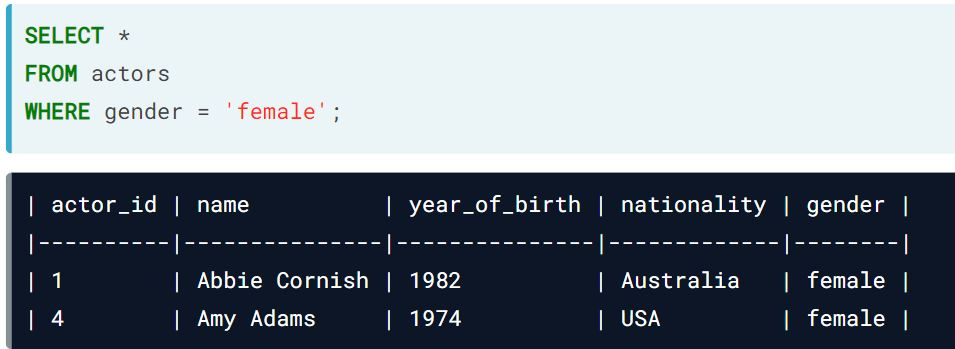

In [12]:
### 

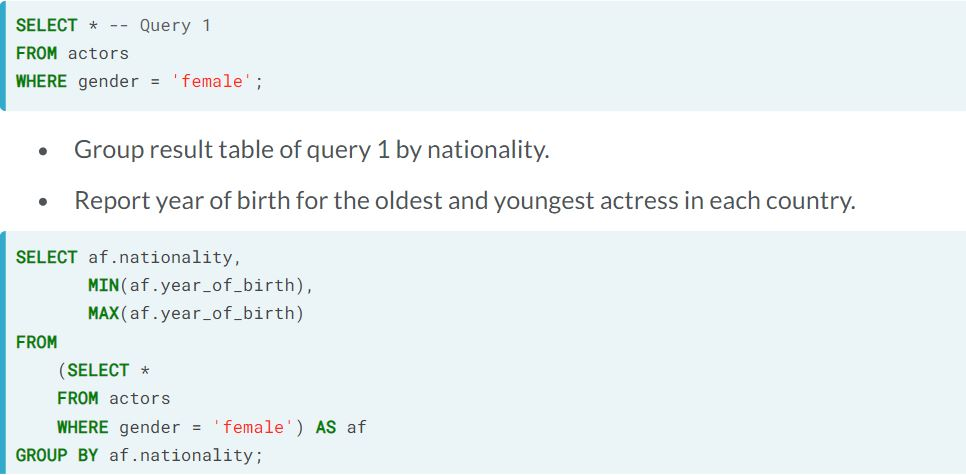

In [13]:
### 

$\qquad$ Result of the subsequent `SELECT` statement - actresses.

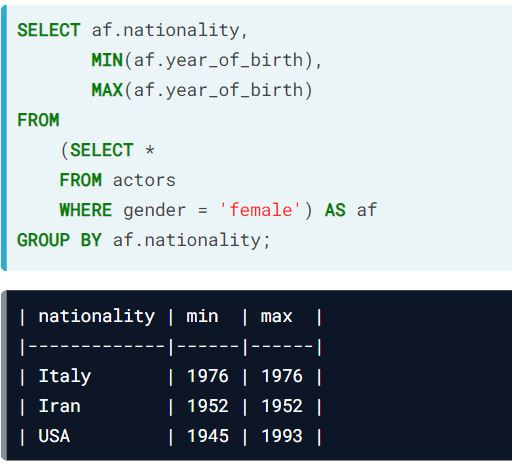

In [14]:
### 

#### How much money each customer spend?
$\qquad \diamond$ **Step 1.** Add `renting_price` from `movies` to `renting` table.

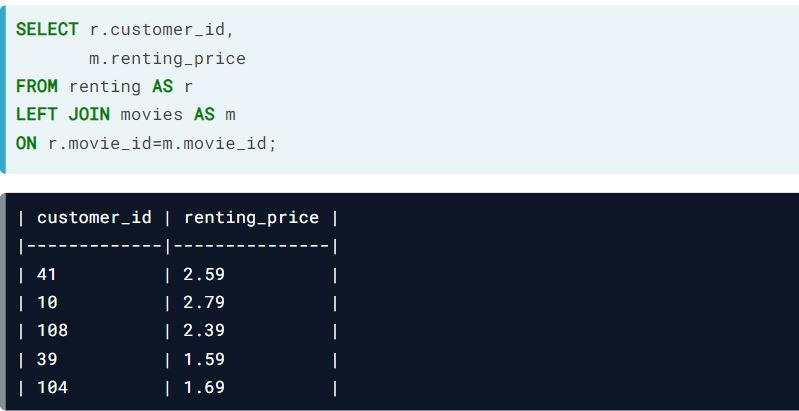

In [15]:
### 

$\qquad \diamond$ **Step 2.** Grouping the table from the first step by the `customer_id` then summing in the `renting_price`.

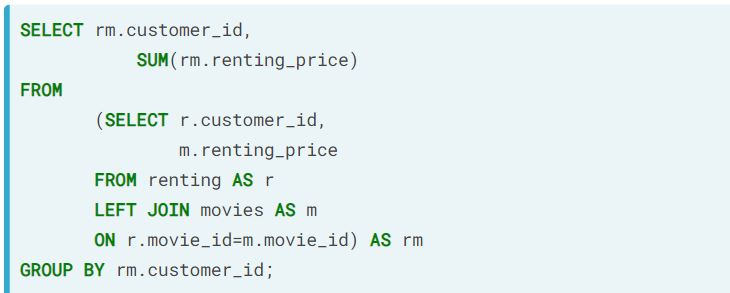

In [16]:
### 

$\qquad \diamond$ **`Result`.**

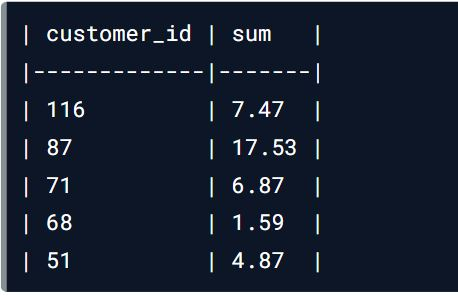

In [17]:
### 

### EXERCISEs.
#### Exercise 3.1. Income from movies
$\qquad$ How much `income` did each `movie` generate? To answer this question `subsequent SELECT` `statements` can be used.

#### Instructions
**Step 1.** Use a join to get the movie title and price for each movie rental.

**SOLUTION.**

                SELECT m.title , -- Use a join to get the movie title and price for each movie rental
                       m.renting_price
                FROM renting AS r
                LEFT JOIN movies AS m
                    ON m.movie_id = r.movie_id;

- **`query result`.**

title|renting_price
:-|:-
Waking Up in Reno|2.59
Two for the Money|2.79
Burn After Reading|2.39
The Hunger Games|1.59
Something's Gotta Give|1.69
...|...

`(578 rows)`

**Step 2.** 
- Report the `total income` for each `movie`.
- Order the result by decreasing `income`.

**SOLUTION.**

                SELECT title, -- Report the income from movie rentals for each movie 
                       SUM(renting_price) AS income_movie
                FROM
                       (SELECT m.title,  
                               m.renting_price
                       FROM renting AS r
                       LEFT JOIN movies AS m
                       ON r.movie_id=m.movie_id) AS rm
                GROUP BY title
                ORDER BY income_movie DESC; -- Order the result by decreasing income

- **`query result`.**

title|income_movie
:-|:-
Bridget Jones - The Edge of Reason|37.57
Fair Game|34.68
The Kingdom|31.35
Two for the Money|30.69
Django Unchained|29.59
...|...
Ghost Rider: Spirit of Vengeance|8.95
Jack and Jill|8.36
The Invasion|8.36
The Human Stain|7.96
The Other Woman|3.38

`(71 rows)`    

**Step 3. Answer this question. Which statement about the movie `'Django Unchained'` is `NOT correct`?**
- `A`. The `income` from this `movie` is `29.59`.
- `B`. The `income` from `'Django Unchained'` is lower than from `'The Kingdom'`.
- `C`. The `income` from `'Django Unchained'` is higher than from `'Simone'`.
- `D`. `'Django Unchained'` has the 5th highest income.

**Answers & comment**
- *A. Incorrect!!* This statement is correct. The income reportet in the table is 29.59.
- *B. Wrong!!* This statement is correct. The income of 'The Kingdom' is 1.76 higher.
- **C. Correct!!!** This statement is **NOT correct**, since `'Django Unchained'` and `'Simon'` generated the same income.
- *D. Wrong!!* This statement is correct. `'Django Unchained'` has the `5th highest` income together with the movie `'Simone'`.

#### Exercise 3.2. Age of actors from the USA
$\qquad$ Now you will explore the age of `American actors` and `actresses`. Report the date of birth of the oldest and youngest US actor and actress.

#### Instructions.
- Create a subsequent `SELECT` statements in the `FROM clause` to get all information about actors from the `USA`.
- Give the subsequent `SELECT` statement the alias `a`.
- Report for actors from the `USA` the `year of birth` of the `oldest` and the year of birth of `the youngest` `actor` and `actress`.

**SOLUTION.**

                SELECT gender, -- Report for male and female actors from the USA 
                       MIN(year_of_birth), -- The year of birth of the oldest actor
                       MAX(year_of_birth) -- The year of birth of the youngest actor
                FROM(
                    SELECT * -- Use a subsequen SELECT to get all information about actors from the USA
                    FROM actors
                    WHERE nationality = 'USA') AS a -- Give the table the name a
                GROUP BY gender;
- **`query result`.**

gender|min|max
:-|:-|:-
female|1945|1993
male|1930|1992

- **Comments.** The `oldest actor` was born in `1930` and the `oldest actress in 1945`.

## 4. Identify favorite actors of customer groups
$\qquad \diamond$ **COMBINING `SQL` STATEMENTS IN ONE-`QUERY`.** Using

                LEFT JOIN
                WHERE
                GROUP BY
                HAVING
                ORDER BY
$\qquad \diamond$ **From `renting` records to `customer` & `actor` information.**

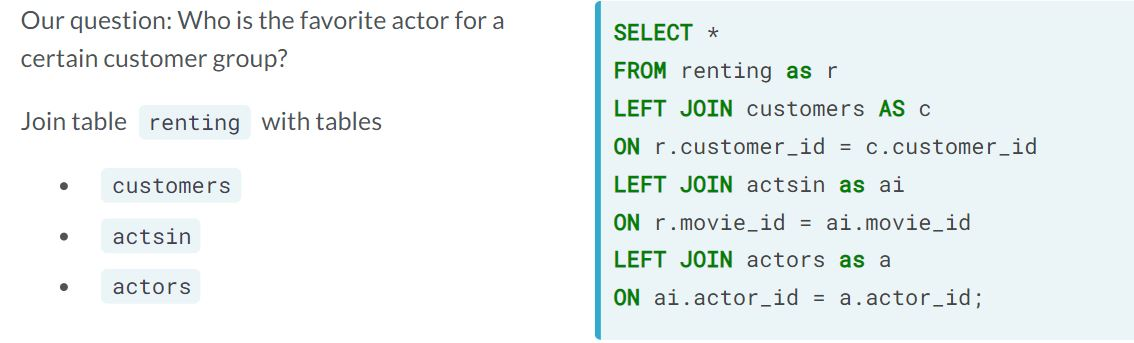

In [18]:
### 

$\qquad \diamond$ **`MALE` customers!**

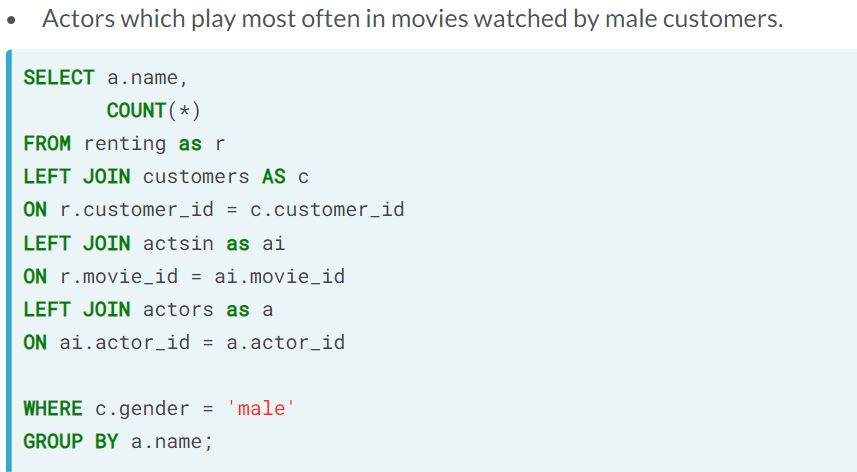

In [19]:
### 

$\qquad \diamond$ **Who is the `favorite actor`?**

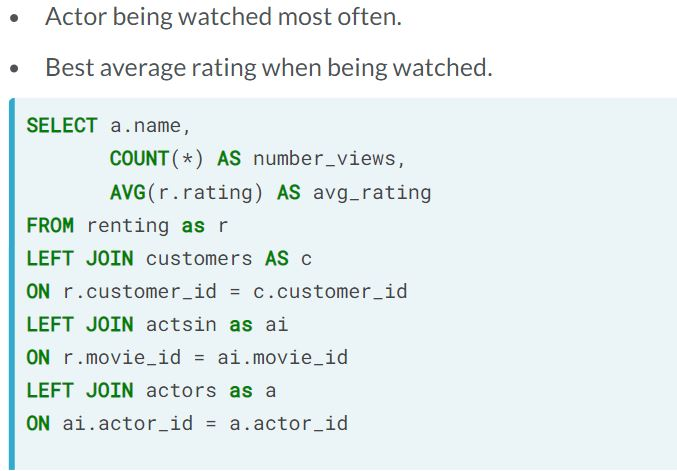

In [20]:
### 

$\qquad \diamond$ **Add `HAVING` & `ORDER BY`**

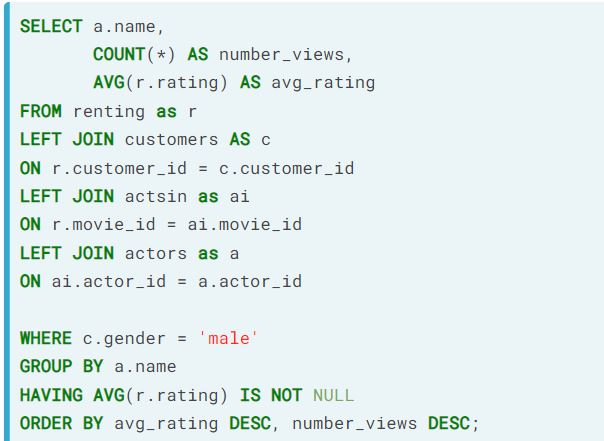

In [21]:
### 

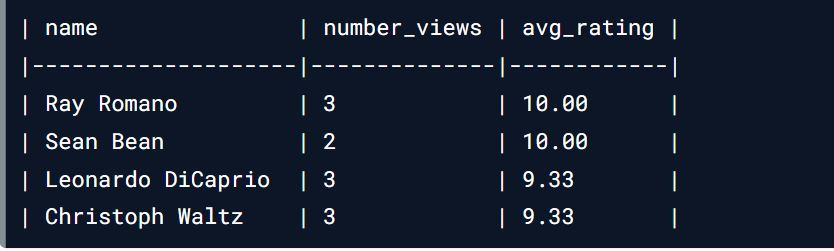

In [22]:
### Result

### EXERCISEs.
#### Exercise 4.1. Identify favorite movies for a group of customers
$\qquad$ Which is the favorite movie on MovieNow? Answer this question for a specific group of customers: for all customers born in the 70s.

#### Instructions.
**Step 1.**
- Augment the table renting with customer information and information about the movies.
- For each join use the first letter of the table name as alias.

**SOLUTION.**

                SELECT * FROM renting AS r
                LEFT JOIN customers AS c
                    ON r.customer_id = c.customer_id
                LEFT JOIN movies AS m
                    ON m.movie_id = r.movie_id
                    
- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting|customer_id|name|country|gender|date_of_birth|date_account_start|movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
1|41|8|null|2018-10-09|41|Zara Mitchell|Great Britan|female|1994-07-08|2017-06-12|8|Waking Up in Reno|Comedy|91|2002|2.59
2|10|29|10|2017-03-01|10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28|29|Two for the Money|Drama|122|2005|2.79
3|108|45|4|2018-06-08|108|Saúl Tafoya Meraz|Spain|male|1992-05-15|2017-03-13|45|Burn After Reading|Drama|96|2008|2.39
4|39|66|8|2018-10-22|39|Amy Haynes|Great Britan|female|1975-07-28|2018-01-19|66|The Hunger Games|Drama|142|2012|1.59
5|104|15|7|2019-03-18|104|Dimitri Zambrano Morales|Spain|male|1992-06-21|2017-04-12|15|Something's Gotta Give|Comedy|128|2003|1.69
6|50|71|7|2018-10-09|50|Csordás Ármin|Hungary|male|1986-11-30|2018-04-23|71|Rio 2|Animation|101|2014|1.79
7|52|21|null|2018-11-10|52|Szepessi Marton|Hungary|male|1983-03-14|2018-03-24|21|The Return of the King|Science Fiction & Fantasy|200|2003|1.99
...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...

`(578 rows)`

**Step 2.** Select only those records of customers born in the `70s`.

**SOLUTION.**

SELECT * FROM renting AS r
LEFT JOIN customers AS c
    ON c.customer_id = r.customer_id
LEFT JOIN movies AS m
    ON m.movie_id = r.movie_id
WHERE date_of_birth BETWEEN '1970-01-01' AND '1979-12-31'

- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting|customer_id|name|country|gender|date_of_birth|date_account_start|movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
4|39|66|8|2018-10-22|39|Amy Haynes|Great Britan|female|1975-07-28|2018-01-19|66|The Hunger Games|Drama|142|2012|1.59
11|61|61|null|2017-06-04|61|Nella Manfrin|Italy|female|1974-01-11|2017-05-14|61|Harry Potter and the Deathly Hallows – Part 2|Science Fiction & Fantasy|130|2011|1.99
15|13|5|10|2017-11-25|13|Thomas T. Nissen|Denmark|male|1975-09-25|2017-04-30|5|The Fellowship of the Ring|Science Fiction & Fantasy|178|2001|2.59
17|22|46|10|2019-02-16|22|Delit Perillard|France|female|1970-01-10|2018-11-18|46|Sleepwalking|Drama|101|2008|1.79
18|36|39|10|2019-03-20|36|Jacob Hope|Great Britan|male|1979-08-27|2018-06-24|39|I'm Not There|Drama|135|2007|1.79
...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...

`(165 rows)`

**Step 3.** For each movie, report the number of times it was rented, as well as the average rating. Limit your results to customers born in the 1970s.

**SOLUTION.**

                    SELECT m.title, 
                           COUNT(*),
                           AVG(r.rating)
                    FROM renting AS r
                    LEFT JOIN customers AS c
                        ON c.customer_id = r.customer_id
                    LEFT JOIN movies AS m
                        ON m.movie_id = r.movie_id
                    WHERE c.date_of_birth BETWEEN '1970-01-01' AND '1979-12-31'
                    GROUP BY title
- **`query result`.**

title|count|avg
:-|:-|:-
V for Vendetta|2|7.0000000000000000
The Fighter|4|10.0000000000000000
Winter's Bone|2|9.5000000000000000
A Good Woman|4|7.3333333333333333
The Return of the King|1|null
Secondhand Lions|4|9.6666666666666667
The Frozen Ground|4|7.5000000000000000
...|...|...
World Trade Center|3|6.5000000000000000
The Fellowship of the Ring|2|10.0000000000000000
Showtime|5|null
Django Unchained|4|10.0000000000000000

`(63 rows)`

**Step 4.** 
- Remove those movies from the table with only one rental.
- Order the result table such that movies with highest rating come first.

**SOLUTION.**

                SELECT m.title, 
                        COUNT(*),
                        AVG(r.rating)
                FROM renting AS r
                LEFT JOIN customers AS c
                    ON c.customer_id = r.customer_id
                LEFT JOIN movies AS m
                    ON m.movie_id = r.movie_id
                WHERE c.date_of_birth BETWEEN '1970-01-01' AND '1979-12-31'
                GROUP BY m.title
                HAVING COUNT(*) > 1 -- Remove movies with only one rental
                ORDER BY avg; -- Order with highest rating first
- **`query result`.**

title|count|avg
:-|:-|:-
The Recruit|2|5.0000000000000000
Something's Gotta Give|3|6.0000000000000000
Then She Found Me|4|6.0000000000000000
Simone|5|6.0000000000000000
Harry Potter and the Deathly Hallows – Part 1|2|6.0000000000000000
The Hunger Games|2|6.5000000000000000
...|...|...
One Night at McCool's|2|10.0000000000000000
The Fellowship of the Ring|2|10.0000000000000000
Showtime|5|null
Waking Up in Reno|2|null
Ray|2|null
Harry Potter and the Deathly Hallows – Part 2|2|null

`(47 rows)`

- **Comments.** Congratulations! You just wrote a `query` with `LEFT JOIN`, `WHERE`, `GROUP BY`, `HAVING` and `ORDER BY`. And you found out that `'The Fellowship of the Ring'` is a movie with one of the best ratings among people born in the `70s`.

#### Exercise 4.2. Identify favorite actors for Spain
$\qquad$ You're now going to explore actor popularity in Spain. Use as alias the first letter of the table, except for the table actsin use ai instead.

#### Instructions
**Step 1.** Augment the table renting with information about customers and actors.

**SOLUTION.**

                SELECT * FROM renting as r 
                LEFT JOIN customers AS c  -- Augment table renting with information about customers 
                    ON r.customer_id = c.customer_id
                LEFT JOIN actsin AS ai -- Augment the table renting with the table actsin
                    ON r.movie_id = ai.movie_id
                LEFT JOIN actors AS a  -- Augment table renting with information about actors
                    ON ai.actor_id = a.actor_id;
                    
**`result`.**                    

renting_id|customer_id|movie_id|rating|date_renting|customer_id|name|country|gender|date_of_birth|date_account_start|actsin_id|movie_id|actor_id|actor_id|name|year_of_birth|nationality|gender
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|-
1|41|8|null|2018-10-09|41|Zara Mitchell|Great Britan|female|1994-07-08|2017-06-12|160|8|107|107|Patrick Swayze|1952|USA|male
1|41|8|null|2018-10-09|41|Zara Mitchell|Great Britan|female|1994-07-08|2017-06-12|152|8|103|103|Natasha Richardson|1963|British|female
1|41|8|null|2018-10-09|41|Zara Mitchell|Great Britan|female|1994-07-08|2017-06-12|28|8|23|23|Charlize Theron|1975|South Africa|female
2|10|29|10|2017-03-01|10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28|172|29|117|117|Rene Russo|1954|USA|female
2|10|29|10|2017-03-01|10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28|143|29|96|96|Matthew McConaughey|1969|USA|male
...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...
577|35|65|9|2017-07-03|35|Harvey Jarvis|Great Britan|male|1990-01-16|2017-05-22|38|65|28|28|Ciaran Hinds|1953|Northern Ireland|male
577|35|65|9|2017-07-03|35|Harvey Jarvis|Great Britan|male|1990-01-16|2017-05-22|210|65|142|142|Violante Placido|1976|Italy|female
578|35|16|null|2017-06-20|35|Harvey Jarvis|Great Britan|male|1990-01-16|2017-05-22|165|16|111|111|Philip Seymour Hoffman|1967|USA|male
578|35|16|null|2017-06-20|35|Harvey Jarvis|Great Britan|male|1990-01-16|2017-05-22|58|16|39|39|Edward Norton|1969|USA|male
578|35|16|null|2017-06-20|35|Harvey Jarvis|Great Britan|male|1990-01-16|2017-05-22|14|16|11|11|Barry Pepper|1970|Canada|male

`(1734 rows)`

**Step 2.** 
- Report the number of movie rentals and the average rating for each actor, separately for male and female customers.
- Report only actors with more than 5 movies

**SOLUTION.**

                SELECT a.name,  c.gender,
                       COUNT(*) AS number_views, 
                       AVG(r.rating) AS avg_rating
                FROM renting as r
                LEFT JOIN customers AS c
                    ON r.customer_id = c.customer_id
                LEFT JOIN actsin as ai
                    ON r.movie_id = ai.movie_id
                LEFT JOIN actors as a
                    ON ai.actor_id = a.actor_id

                GROUP BY a.name, c.gender -- For each actor, separately for male and female customers
                HAVING AVG(r.rating) IS NOT NULL 
                    AND COUNT(*) > 5 -- Report only actors with more than 5 movie rentals
                ORDER BY avg_rating DESC, number_views DESC;

- **`query result`.**

name|gender|number_views|avg_rating
:-|:-|:-|:-
Tommy Lee Jones|female|6|10.0000000000000000
Javier Bardem|female|6|10.0000000000000000
Josh Brolin|female|6|10.0000000000000000
Christoph Waltz|female|8|9.3333333333333333
Leonardo DiCaprio|female|8|9.3333333333333333
Barry Pepper|female|7|9.3333333333333333
...|...|...
Renee Zellweger|male|6|7.0000000000000000
Abbie Cornish|female|6|7.0000000000000000

`(109 rows)`

**Step 3.** Now, report the `favorite actors` only for `customers` from `Spain`.

**SOLUTION.**

                SELECT a.name,  c.gender,
                       COUNT(*) AS number_views, 
                       AVG(r.rating) AS avg_rating
                FROM renting as r
                LEFT JOIN customers AS c
                    ON r.customer_id = c.customer_id
                LEFT JOIN actsin as ai
                    ON r.movie_id = ai.movie_id
                LEFT JOIN actors as a
                    ON ai.actor_id = a.actor_id
                WHERE c.country = 'Spain'
                GROUP BY a.name, c.gender
                HAVING AVG(r.rating) IS NOT NULL 
                  AND COUNT(*) > 5 
                ORDER BY avg_rating DESC, number_views DESC;
- **`query result`.**

name|gender|number_views|avg_rating
:-|:-|:-|:-
Catherine Keener|female|6|8.0000000000000000
Emma Watson|male|7|7.6000000000000000
Daniel Radcliffe|male|7|7.6000000000000000
Rupert Grint|male|7|7.6000000000000000

- **Comments.** Now, you have found out that in this table Catherine Keener is the favorite actress among female Spain customers and that male customers from Spain like the actors from Harry Potter best: Emma Watson, Daniel Radcliffe and Rupert Grint.

#### Exercise 4.3. `KPIs` per country
In chapter 1 you were asked to provide a report about the development of the company. This time you have to prepare a similar report with `KPIs` for each country separately. Your manager is interested in the total number of movie rentals, the average rating of all movies and the total revenue for each country since the beginning of 2019.

#### Instructions
**Step 1.**
- Augment the table `renting` with information about `customers` and `movies`.
- Use as alias the first latter of the table name.
- Select only records about rentals `since beginning of 2019`.

**SOLUTION.**

                    SELECT * FROM renting AS r
                    LEFT JOIN customers AS c
                        ON c.customer_id = r.customer_id
                    LEFT JOIN movies AS m -- Augment the table renting with information about movies
                        ON r.movie_id = m.movie_id
                    WHERE r.date_renting >= '2019-01-01'
- **`query result`.**

renting_id|customer_id|movie_id|rating|date_renting|customer_id|name|country|gender|date_of_birth|date_account_start|movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
5|104|15|7|2019-03-18|104|Dimitri Zambrano Morales|Spain|male|1992-06-21|2017-04-12|15|Something's Gotta Give|Comedy|128|2003|1.69
17|22|46|10|2019-02-16|22|Delit Perillard|France|female|1970-01-10|2018-11-18|46|Sleepwalking|Drama|101|2008|1.79
18|36|39|10|2019-03-20|36|Jacob Hope|Great Britan|male|1979-08-27|2018-06-24|39|I'm Not There|Drama|135|2007|1.79
27|7|36|null|2019-03-14|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12|36|World Trade Center|Drama|129|2006|1.59
32|8|42|10|2019-02-13|8|Jaëla van den Dolder|Belgium|female|1990-08-31|2018-02-08|42|No Country for Old Men|Drama|122|2007|1.49
...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...
562|33|18|null|2019-03-10|33|Oliver Fleming|Great Britan|male|1981-03-04|2018-02-22|18|Secondhand Lions|Drama|111|2003|1.69
567|28|49|8|2019-02-24|28|Sidney Généreux|France|male|1980-12-01|2017-02-04|49|Harry Potter and the Half-Blood Prince|Science Fiction & Fantasy|153|2009|1.59
572|4|61|6|2019-04-16|4|Julia Jung|Austria|female|1991-01-04|2017-11-22|61|Harry Potter and the Deathly Hallows – Part 2|Science Fiction & Fantasy|130|2011|1.99
574|7|14|null|2019-02-08|7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12|14|The Recruit|Mystery & Suspense|115|2003|1.69

`(159 rows)`

**Step 2.**
- Calculate the number of movie rentals.
- Calculate the average rating.
- Calculate the revenue from movie rentals.
- Report these `KPIs` for each country.

**SOLUTION.**

                SELECT 
                    c.country,                      -- For each country report
                    COUNT(*) AS number_renting,   -- The number of movie rentals
                    AVG(r.rating) AS average_rating,  -- The average rating
                    SUM(m.renting_price) AS revenue  -- The revenue from movie rentals
                FROM renting AS r
                LEFT JOIN customers AS c
                    ON c.customer_id = r.customer_id
                LEFT JOIN movies AS m
                    ON m.movie_id = r.movie_id
                WHERE date_renting >= '2019-01-01'
                GROUP BY c.country;
- **`query result`.**

country|number_renting|average_rating|revenue
:-|:-|:-|:-
null|1|10.0000000000000000|1.79
Spain|26|8.0769230769230769|57.94
Great Britan|9|7.2000000000000000|17.91
Austria|4|6.0000000000000000|8.16
Italy|30|8.2352941176470588|69.90
Poland|21|8.1250000000000000|49.29
Slovenia|14|8.0000000000000000|30.26
Hungary|11|7.1666666666666667|25.89
Denmark|7|7.7142857142857143|14.63
Belgium|7|9.0000000000000000|13.13
USA|6|9.0000000000000000|14.54
France|23|7.5333333333333333|51.07

`(12 rows)`

- **Comments.** You calculated a total revenue of 57.94 for Spain, with 26 movie rentals and an average rating of 8.1.